In [5]:
import numpy as np
from scipy import special

# Exercises

<div class="alert alert-block alert-info">

**1. Second derivative**

We can compute a second derivative in the same fashion as we did for the first derivative&mdash;starting with the Taylor expansion about $x_i$ and solving for the second derivative approximation at $i$.
    
Work out the Taylor expansion and compute the second derivative of $f(x) = \sin(x)$ on a grid of 10 points from $[0, \pi]$ at the point `x[3]`.
    
</div>


$$f_{i+1} = f_i + \Delta x \left .\frac{df}{dx} \right |_i + \frac{1}{2} \Delta x^2 \left . \frac{d^2f}{dx^2} \right |_i + \mathcal{O}(\Delta x^3)$$

likewise:

$$f_{i-1} = f_i - \Delta x \left .\frac{df}{dx} \right |_i + \frac{1}{2} \Delta x^2 \left . \frac{d^2f}{dx^2} \right |_i + \mathcal{O}(\Delta x^3)$$

$$f_{i+1} + f_{i-1} = 2 f_i + \Delta x^2 \left . \frac{d^2f}{dx^2} \right |_i + \mathcal{O}(\Delta x^4)$$

$$\left . \frac{d^2f}{dx^2} \right |_i = \frac{f_{i+1} - 2 f_i + f_{i-1}}{\Delta x^2} + \mathcal{O}(\Delta x^2)$$

In [39]:
x = np.linspace(0, np.pi, 20, endpoint=False)

def f(x):
    return np.sin(x)

def second_deriv(x, idx):
    dx = x[idx] - x[idx-1]
    return (f(x[idx+1]) - 2*f(x[idx]) + f(x[idx-1]))/dx**2

print(second_deriv(x, 6), -np.sin(x[6]))

-0.8073548874068714 -0.8090169943749475


<div class="alert alert-block alert-info">

**2. Integrating to infinity**

If our integration limits extend to infinity, we cannot divide the infinite domain into slabs and compute the area under them directly.  Instead we transform the integral.  Consider the gamma function:

$$
\Gamma(a) = \int_0^\infty x^{a-1} e^{-x} dx
$$

The integrand has a maximum at $x = a-1$.
    
To evaluate this numerically, consider a variable transformation of the form:

$$
z = \frac{x}{c + x}
$$

with $c = a - 1$, corresponding to the maximum of the integrand.

With this change of variables, we map $x \in [0, \infty)$ to $z \in [0, 1]$.  (Note: this transformation should only
be used for $a > 1$).
    
Reexpress the integral in terms of $z$ and do the numerical integration.  Compare to the true value of $\Gamma(a)$ for a few values of $a > 1$.
    
(based on Newman)
    
</div>

Our change of variables is:

$$ x = c \frac{z}{1-z}$$

and

$$dx = \frac{cdz}{(1-z)^2}$$

so our integral:

$$
\Gamma(a) = \int_0^\infty \phi(x) dx$$

becomes

$$\Gamma(a) = c \int_0^1 \phi\left (c \frac{z}{1-z}\right ) (1 - z)^{-2} dz$$

Our code is:

In [45]:
# this is a safety factor to prevent NaNs
SMALL = 1.e-20

def integrand(x, a):
    """ the original integrand of our integral"""
    
    # note for a != 1, the integrand is 0 if x == 0

    return np.where(x > 0.0,
                    x**(a-1)*np.exp(-x), 0.0)

def zv(x, a):
    """ transform the variable x -> z """
    c = a - 1.0
    return x/(c + x) 

def xv(z, a):
    """ transform back from z -> x """
    c = a - 1.0
    return c*z/(1.0 - z + SMALL)

def gamma_integral(a, npts):
    """ integrate the gamma function """
    
    z = np.linspace(0.0, 1.0, npts)

    # do the integral via the trapezoid rule.  We will integrate
    # over z = [0, 1].  Our integral, with our change of coords
    # is 
    #
    # I = c int_0^1 f( (z/(1-z)) ) dz/(1-z)^2
    
    I = 0.0
    f = integrand(xv(z, a), a)
    c = a - 1.0

    for n in range(1, npts):
        I += 0.5*(z[n] - z[n-1])*(f[n]/(1.0 - z[n] + SMALL)**2 + 
                                  f[n-1]/(1.0 - z[n-1] + SMALL)**2)
    I *= c

    return I

a = 1.5
N = 200
I = gamma_integral(a, N)
print(I, special.gamma(a))

0.8862007113724986 0.8862269254527579


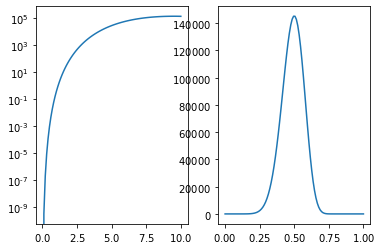

In [54]:
import matplotlib.pyplot as plt
a = 10.5

fig = plt.figure()
ax = fig.add_subplot(121)

x = np.linspace(0, 10, 100)
ax.plot(x, integrand(x, a))
ax.set_yscale("log")

ax = fig.add_subplot(122)
z = np.linspace(0, 1, 100)
ax.plot(z, integrand(xv(z, a), a))
#ax.set_yscale("log")